<a href="https://colab.research.google.com/github/DataAnalysisINP/LissajouFigure/blob/main/lissanjou_figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!pwd
#!pip install scprep

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from numpy.ma.core import tan
#import scprep
import csv
import numpy.fft
from scipy.fftpack import fft, ifft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import statistics

url_v = 'https://raw.githubusercontent.com/DataAnalysisINP/LissajouFigure/main/C1--plasma_on_12mm_3slm_copper_100us--00000.csv'
url_I = 'https://raw.githubusercontent.com/DataAnalysisINP/LissajouFigure/main/C2--plasma_on_12mm_3slm_copper_100us--00000.csv'

#data_V = scprep.io.load_csv(r'/content/drive/MyDrive/Data_CSV/Copper/5_slm_second_test_plasma_jet_the_good_once/C1--plasma_on_12mm_5slm_Bronze_100us--00000.csv', delimiter =',',encoding= 'unicode_escape', header=4)
#data_I = scprep.io.load_csv(r'/content/drive/MyDrive/Data_CSV/Copper/5_slm_second_test_plasma_jet_the_good_once/C2--plasma_on_12mm_5slm_Bronze_100us--00000.csv', encoding= 'unicode_escape', header=4)
#data_V.head()

df_I = pd.read_csv(url_I, encoding= 'unicode_escape',  header=4)
df_v = pd.read_csv(url_v, encoding= 'unicode_escape',  header=4)
df_I.head()

,Time,Ampl
0,-0.0001,0.035152
1,-0.0001,0.052728
2,-0.0001,0.017576
3,-0.0001,0.017576
4,-0.0001,0.035152


In [5]:
df_v.head()

,Time,Ampl
0,-0.0001,1019.490
1,-0.0001,986.281
2,-0.0001,1019.490
3,-0.0001,1019.490
4,-0.0001,986.281


So, there are three different ways to open data. Firstly, with google.collab library but we need to have an ID and password (see in the comment on the right). Secondly, with the scprep library, data isn't saved all the time and therefore you need to request permission to mount your drive each time. So, the problem isn't still solved. Finally, I use the GitHub platform as a "database" it is very easy to save data into the code and handle them afterward: The problem is the free space allowed. we just have 25 MB allowed on the GitHub website.

In [6]:
v = df_v['Ampl'].values.tolist()
I = df_I['Ampl'].values.tolist()
print(len(v))
print(len(I))

while len(I) > 100000:
    I.pop(len(I)-1)
    
while len(v) > 100000:
    v.pop(len(I)-1)

print(len(v))
print(len(I))

100001
100001
100000
100000


In [7]:
V_Max_Right = max(v)
I_Max_Top = max(I)
V_Min_Left = min(v)
I_Min_Bottom = min(I)
print(V_Max_Right)
print(I_Max_Top)
print(V_Min_Left)
print(str(I_Min_Bottom) + '\n')
I_For_Max_V = I[v.index(V_Max_Right)]
I_For_Min_V = I[v.index(V_Min_Left)]
V_For_Max_I = v[I.index(I_Max_Top)]
V_For_Min_I = v[I.index(I_Min_Bottom)]
print(I_For_Max_V)
print(I_For_Min_V)
print(V_For_Max_I)
print(V_For_Min_I)

1119.12
0.404246
-1139.12
-0.404246

0.0175759
-0.0351519
355.303
-275.675


In [8]:
#from re import M
V_Min_Right = []
V_Max_Left = []
I_Min_Top = []
I_Max_Bottom = []

for i in range(0, len(I)):
  if I[i] == I_For_Max_V and v[i] > 0:
    V_Min_Right.append(v[i])
  if I[i] == I_For_Min_V and v[i] < 0:
    V_Max_Left.append(v[i])
  if v[i] == V_For_Max_I and I[i] > 0:
    I_Min_Top.append(I[i])
  if v[i] == V_For_Min_I and I[i] < 0:
    I_Max_Bottom.append(I[i])

V_Min_Right = min(V_Min_Right)
V_Max_Left = max(V_Max_Left)
I_Min_Top = min(I_Min_Top)
I_Max_Bottom = max(I_Max_Bottom)

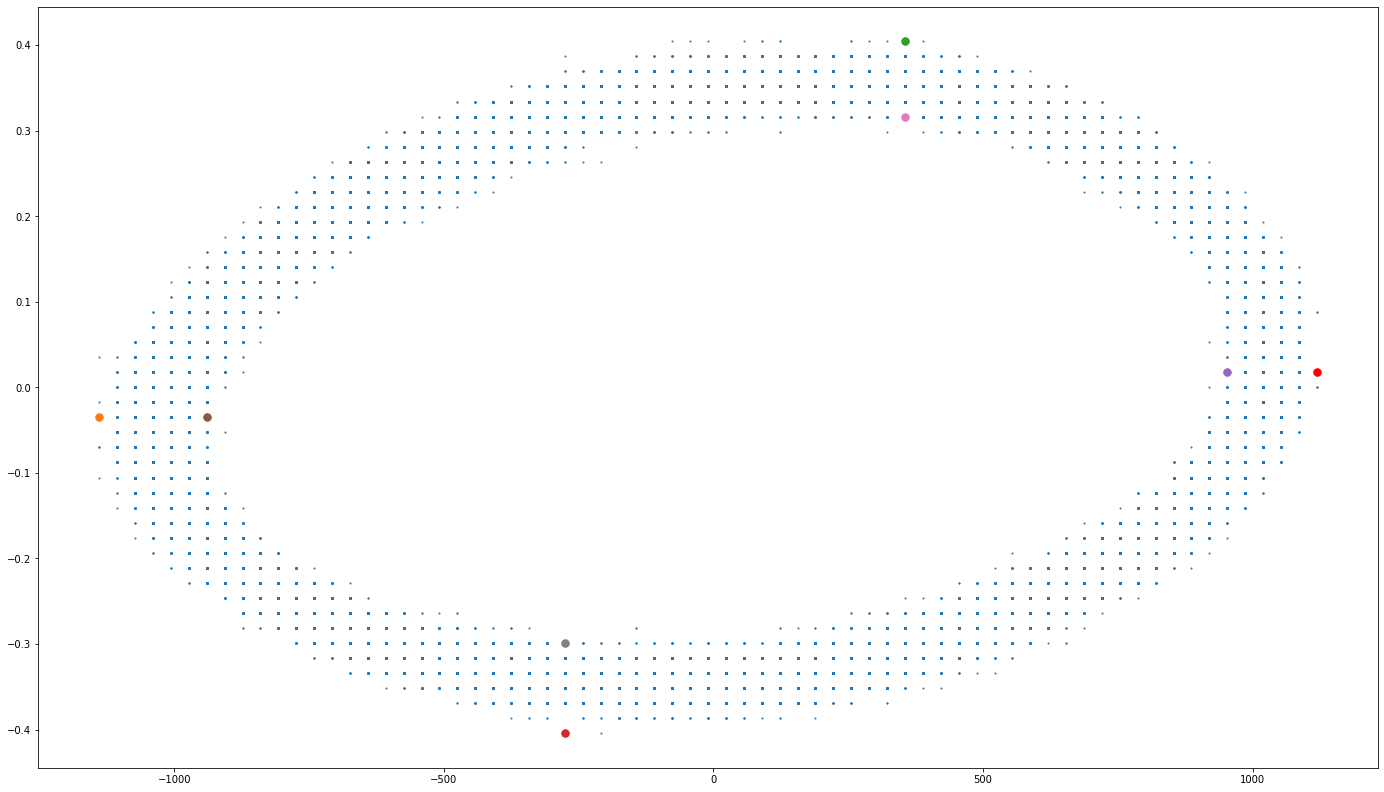

In [9]:
%matplotlib inline
plt.figure(1, figsize=[24,14])
plt.plot(v, I, '.', markersize=2)

plt.plot(V_Max_Right, I_For_Max_V, 'r.', markersize=15)
plt.plot(V_Min_Left, I_For_Min_V, '.', markersize=15)
plt.plot(V_For_Max_I, I_Max_Top, '.', markersize=15)
plt.plot(V_For_Min_I, I_Min_Bottom, '.', markersize=15)

plt.plot(V_Min_Right, I_For_Max_V, '.', markersize=15)
plt.plot(V_Max_Left, I_For_Min_V, '.', markersize=15)
plt.plot(V_For_Max_I, I_Min_Top, '.', markersize=15)
plt.plot(V_For_Min_I, I_Max_Bottom, '.', markersize=15)

83.02
99.63
0.04
0.05


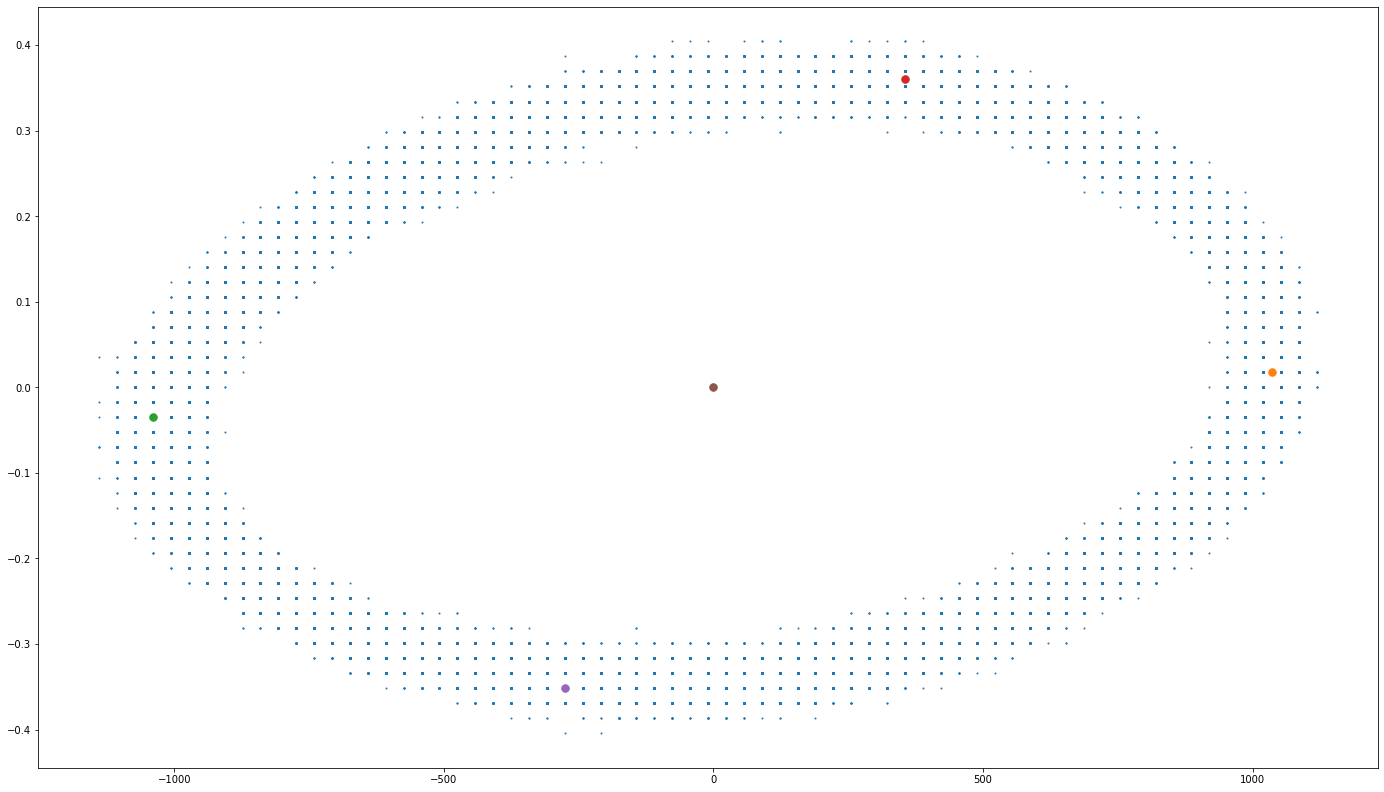

In [10]:
median_Right = (V_Max_Right - V_Min_Right) /2
median_Left =  (V_Max_Left - V_Min_Left) / 2
median_Bottom = (I_Max_Top - I_Min_Top) / 2
median_Top =  (I_Max_Bottom - I_Min_Bottom) / 2

a = V_Min_Right + median_Right
b = V_Max_Left - median_Left
c = I_Min_Top + median_Bottom
d = I_Max_Bottom - median_Top

print(round(median_Right,2))
print(round(median_Left,2))
print(round(median_Bottom,2))
print(round(median_Top,2))

plt.figure(2, figsize=[24,14])
plt.plot(v, I, '.', markersize=2)
'''
plt.plot(V_Max_Right , I_For_Max_V, 'r.', markersize=15)
plt.plot(V_Min_Left, I_For_Min_V, '.', markersize=15)
plt.plot(V_For_Max_I, I_Max_Top, '.', markersize=15)
plt.plot(V_For_Min_I, I_Min_Bottom, '.', markersize=15)

plt.plot(V_Min_Right, I_For_Max_V, '.', markersize=15)
plt.plot(V_Max_Left, I_For_Min_V, '.', markersize=15)
plt.plot(V_For_Max_I, I_Min_Top, '.', markersize=15)
plt.plot(V_For_Min_I, I_Max_Bottom, '.', markersize=15)
'''
plt.plot(a, I_For_Max_V , '.', markersize=15)
plt.plot(b, I_For_Min_V, '.', markersize=15)
plt.plot(V_For_Max_I, c, '.', markersize=15)
plt.plot(V_For_Min_I, d, '.', markersize=15)
plt.plot(0, 0, '.', markersize=15)

phase shift = 79.72853593991667


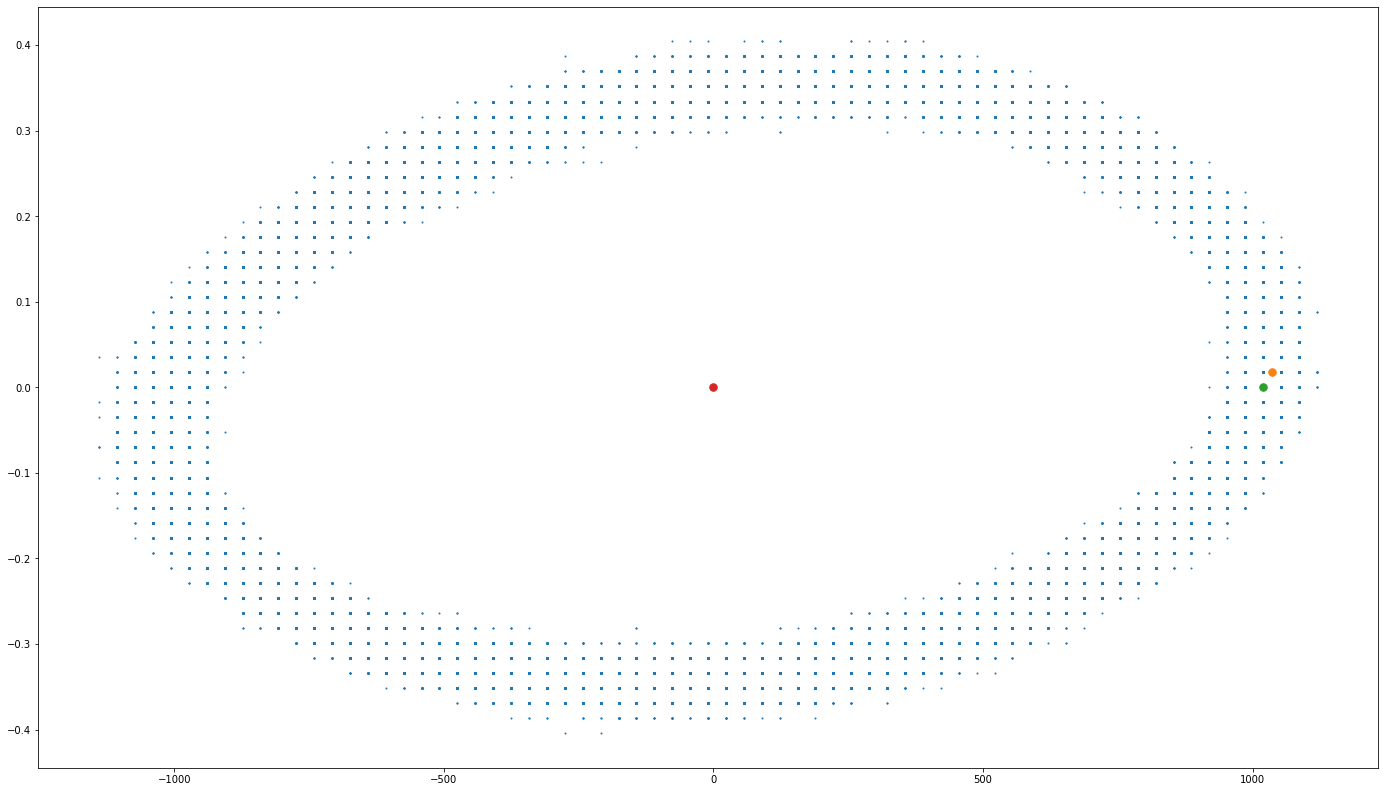

In [11]:
v_null =[]
for i in range(0, len(I)-1):
  if I[i] == 0 and  v[i] > 0:
    I_null = I[i]
    v_null.append(v[i])

v_null_max = max(v_null)
v_null_min = min(v_null)

e = (v_null_max - v_null_min)/2
e = v_null_min + e

plt.figure(3, figsize=[24,14])
plt.plot(v, I, '.', markersize=2)
plt.plot(a, I_For_Max_V , '.', markersize=15)
plt.plot(e, I_null , '.', markersize=15)
plt.plot(0, 0 , '.', markersize=15)

phi = e/a
phase_shift = np.rad2deg(np.arcsin(phi))
print('phase shift = ' + str(phase_shift))


In [12]:
I_value = list(set(I))
I_value.sort(reverse = True)

v_value = list(set(v))
v_value.sort(reverse = True)

IV_pair_list = []

for a in I_value:
  for b in v_value:
    IV_pair_list.append([a,b])

In [13]:
IV_random_list = []
for i in range(0, len(I)-1):
  IV_random_list.append([I[i],v[i]])

In [14]:
for i in range(0,len(IV_pair_list)):
  number =0
  number = IV_random_list.count(IV_pair_list[i])
  IV_pair_list[i].append(number)

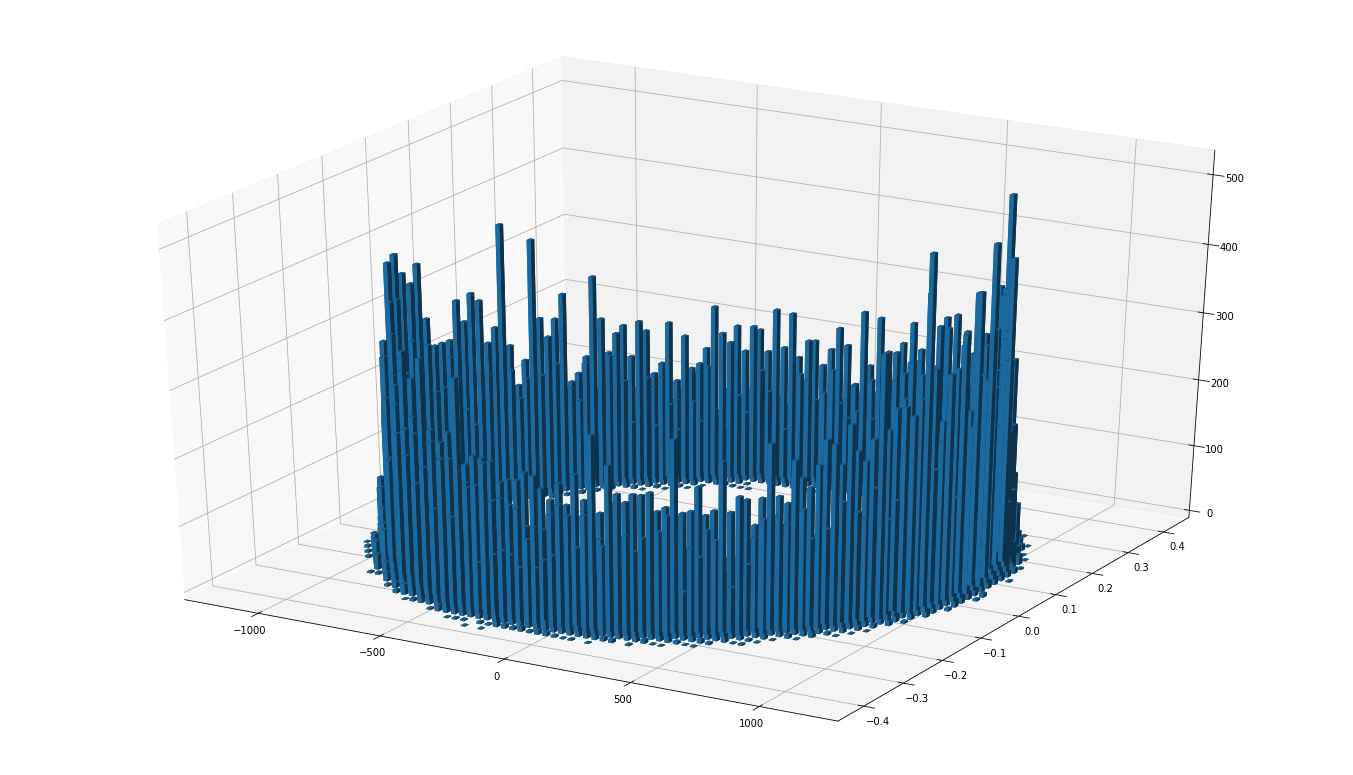

In [65]:
from mpl_toolkits.mplot3d import Axes3D 
I_new = []
v_new = []
number_new = []

for i in range(0, len(IV_pair_list)):
  if IV_pair_list[i][2] != 0:
    I_new.append(IV_pair_list[i][0])
    v_new.append(IV_pair_list[i][1])
    number_new.append(IV_pair_list[i][2])

I_new = np.array(I_new)
v_new = np.array(v_new)
number_new = np.array(number_new)

Delta_v = (v_value[1] - v_value[2])/2
Delta_I = (I_value[1] - I_value[2])/2

width = Delta_v
depth = Delta_I
bottom = np.zeros(len(number_new))
top = number_new

fig = plt.figure(5, figsize=[24,14])
ax = fig.add_subplot(projection='3d')
ax.bar3d(v_new, I_new, bottom, width, depth, top, shade=True)
